In [1]:
# Imports needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df = pd.read_csv("KNN_Project_Data")
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [3]:
df.isnull().mean()

XVPM            0.0
GWYH            0.0
TRAT            0.0
TLLZ            0.0
IGGA            0.0
HYKR            0.0
EDFS            0.0
GUUB            0.0
MGJM            0.0
JHZC            0.0
TARGET CLASS    0.0
dtype: float64

In [4]:
df['TARGET CLASS'].value_counts()

0    500
1    500
Name: TARGET CLASS, dtype: int64

array([[<AxesSubplot:title={'center':'TRAT'}>]], dtype=object)

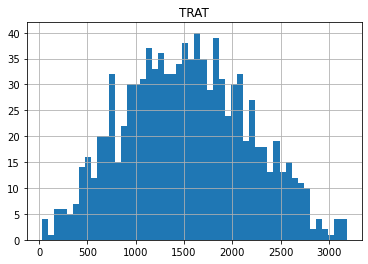

In [5]:
df.hist(column='TRAT', bins=50)

<AxesSubplot:>

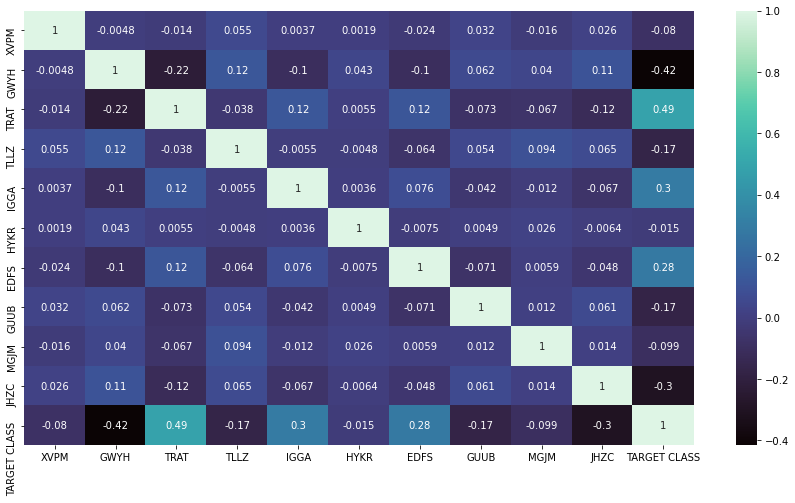

In [6]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "mako")

In [8]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [18]:
x = df.drop('TARGET CLASS',axis = 1)# axis = 1 for columns..
x.head()
X = df.iloc[:,:-1]
X

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792
...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020


## Normalizing the Data
Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

<AxesSubplot:>

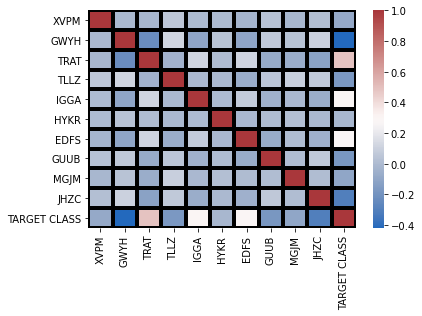

In [7]:
sns.heatmap(df.corr(),cmap='vlag',linewidths=3,linecolor='black')

### Scaling the data
Standardize features by removing the mean and scaling to unit variance & creating a dataframe of scaled values

In [19]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaleddf = pd.DataFrame(scaled,columns=df.columns[:-1])

In [20]:
type(scaled)

numpy.ndarray

In [12]:
scaleddf.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


### Train Test Split
X is the scaled dataframe, y is our Target Class, test size is 30%

In [13]:
X = scaleddf
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Choosing K value
Comparing error rates to choose which K value has lowest error rate

In [14]:
err_rate = []

for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

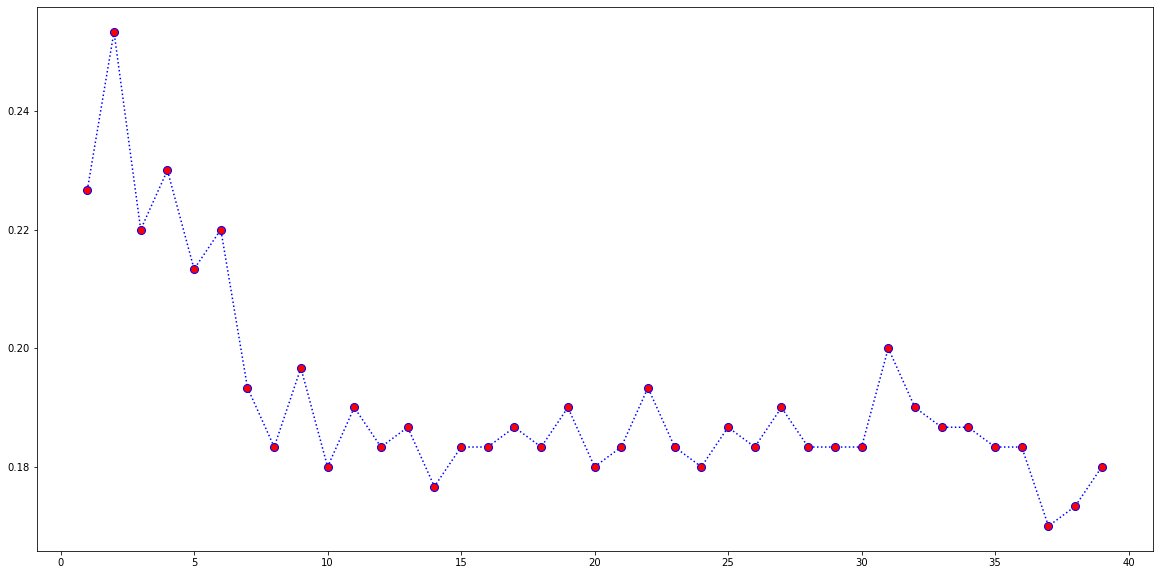

In [15]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40,2),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
plt.title = 'K Values VS Error Rates'
plt.xlabel = 'K Value'
plt.ylabel= 'Error Rate'
plt.show()

### KNN
Creating model with best n_neighbors & Fitting the model to our training data

In [16]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=22)

### Predicting values 

In [17]:
pred = knn.predict(X_test)

*  Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

* Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

* F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

### Evaluations & Results¶
Classification Report

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       148
           1       0.86      0.86      0.86       152

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### Confusion Matrix
[TP] [FN]
[FP] [TN]

In [19]:
print(confusion_matrix(y_test,pred))

[[126  22]
 [ 22 130]]


### Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

Let’s consider the following example:

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid.

Suppose, you defined the grid as: a1 = [0,1,2,3,4,5] a2 = [10,20,30,40,5,60] a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [20]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_)) 
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.836
Best Parameters: {'n_neighbors': 36}


### Refrences

* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/   

In [22]:
a = 5
a == 5

True

In [23]:
a != 4

True